## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column 'price').

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

Let's load the data:


In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [33]:
!wget $data

--2021-10-17 09:52:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  8.88MB/s    in 0.8s    

2021-10-17 09:52:44 (8.88 MB/s) - ‘AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [34]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)



    Apply the log tranform to price

    Do train/validation/test split with 60%/20%/20% distribution.
    
    Use the train_test_split function and set the random_state parameter to 1



In [35]:
df.columns = df.columns.str.lower()

In [36]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [37]:
from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val= train_test_split(df_full_train,test_size=0.25,random_state=1)

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)



In [40]:
y_train

array([4.7095302 , 4.26267988, 6.13339804, ..., 3.93182563, 5.52545294,
       5.39362755])

In [41]:
del df_train['price']
del df_val['price']
del df_test['price']

Now, use DictVectorizer to turn train and validation into matrices:

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [43]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)

In [44]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[363.     ,   1.     ,  40.76434, ...,   1.     ,   0.     ,
          0.     ],
       [  0.     ,   1.     ,  40.73442, ...,   0.     ,   1.     ,
          0.     ],
       [113.     ,   5.     ,  40.66359, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [178.     ,   2.     ,  40.69034, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.76324, ...,   1.     ,   0.     ,
          0.     ],
       [362.     ,  23.     ,  40.74563, ...,   1.     ,   0.     ,
          0.     ]])

In [45]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable.

    Train a model with max_depth=1



In [46]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [47]:
y_pred = dt.predict(X_val)
y_pred

array([4.29239363, 5.14878079, 5.14878079, ..., 5.14878079, 5.14878079,
       5.14878079])

In [48]:
from sklearn.tree import export_text

In [49]:
print(export_text(dt,feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



/home/subman_jil/anaconda3/envs/py39tf2.6/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Which feature is used for splitting the data?

    room_type
    neighbourhood_group
    number_of_reviews
    reviews_per_month




Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)



In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf = RandomForestRegressor(n_estimators=10,
                            random_state=1)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=1)

In [52]:
y_pred = rf.predict(X_val)
y_pred

array([4.8782275 , 4.79199459, 5.49902928, ..., 5.03652684, 4.72644125,
       5.41201993])

In [53]:

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [54]:
rmse_score = rmse(y_val,y_pred)
print(" RMSE of this model on validation : %s" %(rmse_score))

 RMSE of this model on validation : 0.4598535778342608




What's the RMSE of this model on validation?

    0.059
    0.259
    0.459
    0.659




Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10
    Set random_state to 1
    Evaluate the model on the validation dataset



In [55]:
scores=[]
for n in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_score =  rmse(y_val,y_pred)
    scores.append((n,rmse_score))
    print("Est : %4s , RMSE : %.3f " %(n, rmse(y_val,y_pred)))

Est :   10 , RMSE : 0.460 
Est :   20 , RMSE : 0.448 
Est :   30 , RMSE : 0.445 
Est :   40 , RMSE : 0.443 
Est :   50 , RMSE : 0.442 
Est :   60 , RMSE : 0.442 
Est :   70 , RMSE : 0.441 
Est :   80 , RMSE : 0.441 
Est :   90 , RMSE : 0.440 
Est :  100 , RMSE : 0.440 
Est :  110 , RMSE : 0.439 
Est :  120 , RMSE : 0.439 
Est :  130 , RMSE : 0.439 
Est :  140 , RMSE : 0.439 
Est :  150 , RMSE : 0.439 
Est :  160 , RMSE : 0.439 
Est :  170 , RMSE : 0.439 
Est :  180 , RMSE : 0.439 
Est :  190 , RMSE : 0.439 
Est :  200 , RMSE : 0.439 




After which value of n_estimators does RMSE stop improving?

    10
    50
    70
    120




Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    Fix the random seed: random_state=1



In [56]:
rmse_scores2=[]
for d in [10,15,20,25]:
    for n in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=n,max_depth=d,random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score =  rmse(y_val,y_pred)
        rmse_scores2.append((n,rmse_score))
        print("Depth:  %s , Est : %4s , RMSE : %.3f " %(d,n, rmse(y_val,y_pred)))

Depth:  10 , Est :   10 , RMSE : 0.446 
Depth:  10 , Est :   20 , RMSE : 0.442 
Depth:  10 , Est :   30 , RMSE : 0.441 
Depth:  10 , Est :   40 , RMSE : 0.442 
Depth:  10 , Est :   50 , RMSE : 0.441 
Depth:  10 , Est :   60 , RMSE : 0.441 
Depth:  10 , Est :   70 , RMSE : 0.441 
Depth:  10 , Est :   80 , RMSE : 0.441 
Depth:  10 , Est :   90 , RMSE : 0.440 
Depth:  10 , Est :  100 , RMSE : 0.440 
Depth:  10 , Est :  110 , RMSE : 0.440 
Depth:  10 , Est :  120 , RMSE : 0.440 
Depth:  10 , Est :  130 , RMSE : 0.440 
Depth:  10 , Est :  140 , RMSE : 0.440 
Depth:  10 , Est :  150 , RMSE : 0.440 
Depth:  10 , Est :  160 , RMSE : 0.440 
Depth:  10 , Est :  170 , RMSE : 0.440 
Depth:  10 , Est :  180 , RMSE : 0.440 
Depth:  10 , Est :  190 , RMSE : 0.440 
Depth:  10 , Est :  200 , RMSE : 0.440 
Depth:  15 , Est :   10 , RMSE : 0.450 
Depth:  15 , Est :   20 , RMSE : 0.441 
Depth:  15 , Est :   30 , RMSE : 0.439 
Depth:  15 , Est :   40 , RMSE : 0.439 
Depth:  15 , Est :   50 , RMSE : 0.438 


In [57]:
rmse_scores2

[(10, 0.445596171749275),
 (20, 0.4420328271557668),
 (30, 0.4413920618234788),
 (40, 0.44154053612675453),
 (50, 0.4411204060832355),
 (60, 0.44109567579839254),
 (70, 0.4408047570608675),
 (80, 0.44063392403596924),
 (90, 0.44036005791386457),
 (100, 0.44014389763440204),
 (110, 0.44005376814946023),
 (120, 0.4398402482041808),
 (130, 0.43987437072357427),
 (140, 0.43986622925383334),
 (150, 0.4396889639485266),
 (160, 0.43964472224544),
 (170, 0.4396245440870465),
 (180, 0.43971691214366415),
 (190, 0.43966858819736404),
 (200, 0.43967928458182964),
 (10, 0.4498175486561694),
 (20, 0.4408041687050629),
 (30, 0.43943995012339654),
 (40, 0.43879194239068187),
 (50, 0.4381084280548172),
 (60, 0.43775747746327964),
 (70, 0.43738503419468694),
 (80, 0.43726848667661466),
 (90, 0.4368704327073059),
 (100, 0.4365436143948067),
 (110, 0.43628759495649394),
 (120, 0.43623226968337897),
 (130, 0.43632851739490763),
 (140, 0.43624458339022953),
 (150, 0.4362820924966425),
 (160, 0.436098276783



What's the best max_depth:

    10
    15
    20
    25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?



Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split.

When doint it, we can calculate "gain" - the reduction in impurity before and after the split.

This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parametes:

        n_estimators=10,

        max_depth=20,

        random_state=1,

        n_jobs=-1 (optional)
        
    Get the feature importance information from this model



In [58]:
rf1 = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1)
rf1.fit(X_train, y_train)

y_pred = rf.predict(X_val)
x = rf1.feature_importances_.round(3)
y = dv.get_feature_names()
print(list(zip(x,y)))
print(max(x),y[12])

[(0.077, 'availability_365'), (0.03, 'calculated_host_listings_count'), (0.152, 'latitude'), (0.153, 'longitude'), (0.053, 'minimum_nights'), (0.0, 'neighbourhood_group=Bronx'), (0.001, 'neighbourhood_group=Brooklyn'), (0.034, 'neighbourhood_group=Manhattan'), (0.001, 'neighbourhood_group=Queens'), (0.0, 'neighbourhood_group=Staten Island'), (0.043, 'number_of_reviews'), (0.055, 'reviews_per_month'), (0.392, 'room_type=Entire home/apt'), (0.005, 'room_type=Private room'), (0.004, 'room_type=Shared room')]
0.392 room_type=Entire home/apt


/home/subman_jil/anaconda3/envs/py39tf2.6/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




What's the most important feature?

    neighbourhood_group=Manhattan
    room_type=Entire home/apt
    longitude
    latitude




Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}



In [60]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 8.3 kB/s 


In [61]:
import xgboost as xgb

In [62]:
features = dv.get_feature_names()

dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)

dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

/home/subman_jil/anaconda3/envs/py39tf2.6/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [64]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [65]:
scores = {}

In [75]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,num_boost_round=100,evals=watchlist)

In [76]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'



Now change eta first to 0.1 and then to 0.01


In [80]:
scores.keys(),scores.items()

(dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.3']),
 dict_items([('eta=0.01',     num_iter  train_rmse  val_rmse
 0          0     4.25336   4.25010
 1          1     4.21141   4.20815
 2          2     4.16988   4.16661
 3          3     4.12877   4.12551
 4          4     4.08807   4.08481
 ..       ...         ...       ...
 95        95     1.69373   1.69214
 96        96     1.67804   1.67647
 97        97     1.66251   1.66095
 98        98     1.64716   1.64563
 99        99     1.63198   1.63045
 
 [100 rows x 3 columns]), ('eta=0.1',     num_iter  train_rmse  val_rmse
 0          0     3.87217   3.86889
 1          1     3.49150   3.48840
 2          2     3.14949   3.14635
 3          3     2.84232   2.83951
 4          4     2.56650   2.56412
 ..       ...         ...       ...
 95        95     0.40406   0.43272
 96        96     0.40397   0.43272
 97        97     0.40361   0.43269
 98        98     0.40321   0.43260
 99        99     0.40277   0.43250
 
 [100 rows x 3 columns

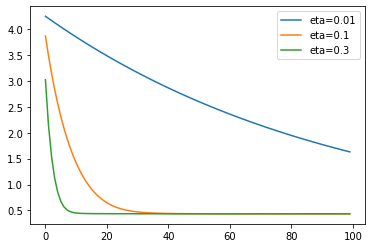

In [78]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    

plt.legend()



What's the best eta?

    0.3
    0.1
    0.01

